In [22]:
import numpy as np
import pulp as pulp
from pulp import *
import random
from tqdm import tqdm
from useful import *
from joblib import Parallel, delayed
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator
from scipy.stats import linregress
from scipy.optimize import minimize
import time

In [2]:
data = np.load('paras_non_degenerate.npz')

P0 = data['P0']
P1 = data['P1']
P2 = data['P2']
R0 = data['R0']
R1 = data['R1']
R2 = data['R2']
init = data['init']
D = data['D']
b = data['b']

data.close()

In [3]:
T = 10
print(check_degeneracy_strong(P0,P1,P2,R0,R1,R2,init,D,b,T))
print(check_degeneracy_weak(P0,P1,P2,R0,R1,R2,init,D,b,T))

True
False


In [4]:
myN = [2**n for n in range(5,15)]
T = 10
infos = []

# Function that combines occupation_measure_sim and update_sim
def simulate_both(states, T, P0, P1, P2, R0, R1, R2, D, b):
    v1 = occupation_measure_sim(states, T, P0, P1, P2, R0, R1, R2, D, b)
    v2 = update_sim(states, T, P0, P1, P2, R0, R1, R2, D, b)
    return v1, v2

for N in myN:
    states = give_states(N,init)
    true_init = states/N
    # Parallel execution with joblib
    results = Parallel(n_jobs=-1)(delayed(simulate_both)(states, T, P0, P1, P2, R0, R1, R2, D, b) for _ in tqdm(range(8000)))

    # Extracting results
    V1 = [result[0] for result in results]
    V2 = [result[1] for result in results]

    # Compute metrics
    v_rel = get_rel(P0, P1, P2, R0, R1, R2, true_init, D, b, T)
    perf_occupation_measure = np.mean(V1)
    perf_update = np.mean(V2)
    std_occupation_measure = np.std(V1)
    std_update = np.std(V2)

    info = [v_rel, [perf_update, std_update], [perf_occupation_measure, std_occupation_measure]]
    print("N = " + str(N) + ": " + str(info))
    infos.append(info)


100%|██████████| 8000/8000 [07:27<00:00, 17.88it/s]


N = 32: [51.82382676167914, [47.27337439924432, 0.8506596313438739], [45.66788881563462, 1.1853184134875354]]


100%|██████████| 8000/8000 [09:06<00:00, 14.64it/s]


N = 64: [51.80289071430242, [49.326814576211476, 0.571114037152357], [47.53747401320229, 0.8689795298410491]]


100%|██████████| 8000/8000 [09:30<00:00, 14.03it/s]


N = 128: [51.80653132589157, [50.49727935271527, 0.403151854855495], [48.783967207980076, 0.662008762484225]]


100%|██████████| 8000/8000 [09:47<00:00, 13.62it/s]


N = 256: [51.79578378087247, [51.05060265917655, 0.28422847452699074], [49.6948284772261, 0.4730788202782659]]


100%|██████████| 8000/8000 [10:03<00:00, 13.25it/s]


N = 512: [51.792801284735646, [51.36400137974104, 0.20336636766294802], [50.3365195588394, 0.328994340749182]]


100%|██████████| 8000/8000 [10:14<00:00, 13.02it/s]


N = 1024: [51.792801284735646, [51.526856724275056, 0.1412937428203442], [50.77279362652328, 0.2362820184041255]]


100%|██████████| 8000/8000 [11:06<00:00, 12.01it/s]


N = 2048: [51.794581886744524, [51.64761021910637, 0.09791947273551879], [51.07504757949632, 0.1667039124200451]]


100%|██████████| 8000/8000 [13:18<00:00, 10.02it/s]


N = 4096: [51.794363423022446, [51.720025589648934, 0.06831625679110999], [51.290178020474606, 0.11759172222856844]]


100%|██████████| 8000/8000 [17:56<00:00,  7.43it/s]


N = 8192: [51.794188532534534, [51.75928148363622, 0.046705231118324524], [51.438642714033634, 0.08300341721729303]]


100%|██████████| 8000/8000 [27:11<00:00,  4.90it/s]


N = 16384: [51.79417550775369, [51.778289295257714, 0.032768715615946464], [51.544402251690556, 0.058941784902228574]]


In [22]:
myN = [2**n for n in range(15,18)]

# Function that combines occupation_measure_sim and update_sim
def simulate_both(states, T, P0, P1, P2, R0, R1, R2, D, b):
    v1 = occupation_measure_sim(states, T, P0, P1, P2, R0, R1, R2, D, b)
    v2 = update_sim(states, T, P0, P1, P2, R0, R1, R2, D, b)
    return v1, v2

for N in myN:
    states = give_states(N,init)
    true_init = states/N
    # Parallel execution with joblib
    results = Parallel(n_jobs=-1)(delayed(simulate_both)(states, T, P0, P1, P2, R0, R1, R2, D, b) for _ in tqdm(range(8000)))

    # Extracting results
    V1 = [result[0] for result in results]
    V2 = [result[1] for result in results]

    # Compute metrics
    v_rel = get_rel(P0, P1, P2, R0, R1, R2, true_init, D, b, T)
    perf_occupation_measure = np.mean(V1)
    perf_update = np.mean(V2)
    std_occupation_measure = np.std(V1)
    std_update = np.std(V2)

    info = [v_rel, [perf_update, std_update], [perf_occupation_measure, std_occupation_measure]]
    print("N = " + str(N) + ": " + str(info))
    infos.append(info)

100%|██████████| 8000/8000 [42:01<00:00,  3.17it/s]


N = 32768: [51.794219436061454, [51.78559684941318, 0.023143853977213934], [51.61828651414192, 0.0416181907549442]]


100%|██████████| 8000/8000 [1:18:49<00:00,  1.69it/s]


N = 65536: [51.79422253519401, [51.79014864637878, 0.016238275571126053], [51.66925163903809, 0.029684236809284816]]


100%|██████████| 8000/8000 [2:30:09<00:00,  1.13s/it]  


N = 131072: [51.794208419171596, [51.79221234964336, 0.01168526620944721], [51.70567849757339, 0.020940406626628695]]


In [2]:
data = np.load('non-degenerate-sim.npz', allow_pickle=True)
infos = data['infos']
infos = infos.tolist()
infos = infos[2:]

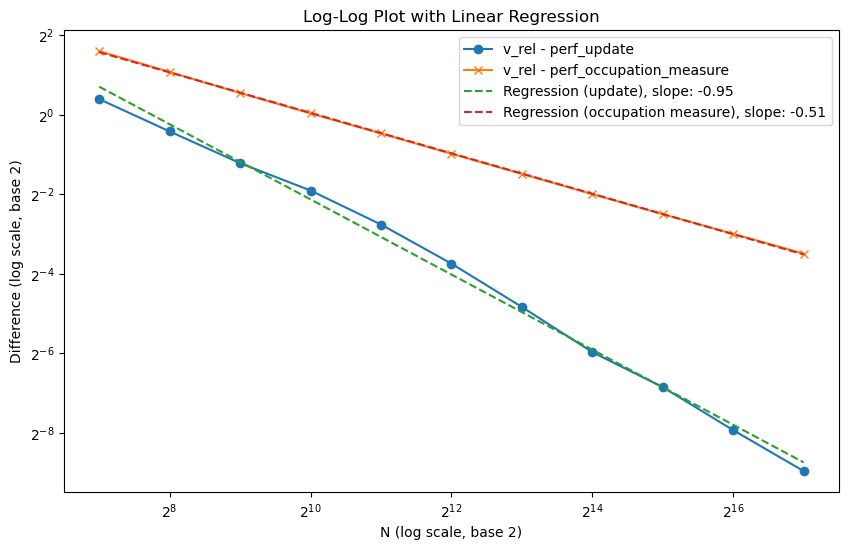

In [4]:
myN = [2**n for n in range(7,18)]

diff_update = [info[0] - info[1][0] for info in infos]
diff_occupation_measure = [info[0] - info[2][0] for info in infos]

# Log transformation of the data
log_myN = np.log2(myN)
log_diff_update = np.log2(np.abs(diff_update))  # Taking absolute value to avoid issues with log of negative numbers
log_diff_occupation_measure = np.log2(np.abs(diff_occupation_measure))

# Perform linear regression
slope_update, intercept_update, _, _, _ = linregress(log_myN, log_diff_update)
slope_occupation_measure, intercept_occupation_measure, _, _, _ = linregress(log_myN, log_diff_occupation_measure)

# Log-log plot with slopes in the labels
plt.figure(figsize=(10, 6))

# Plotting original data
plt.plot(myN, diff_update, label='v_rel - perf_update', marker='o')
plt.plot(myN, diff_occupation_measure, label='v_rel - perf_occupation_measure', marker='x')

# Plotting regression lines and including slopes in the labels
plt.plot(myN, 2 ** (slope_update * log_myN + intercept_update), label=f'Regression (update), slope: {slope_update:.2f}', linestyle='--')
plt.plot(myN, 2 ** (slope_occupation_measure * log_myN + intercept_occupation_measure), 
         label=f'Regression (occupation measure), slope: {slope_occupation_measure:.2f}', linestyle='--')

# Setting log scale for both axes with base 2
plt.xscale('log', base=2)
plt.yscale('log', base=2)

# Labels, title, and legend
plt.xlabel('N (log scale, base 2)')
plt.ylabel('Difference (log scale, base 2)')
plt.title('Log-Log Plot with Linear Regression')
plt.legend()

# Customizing the tick labels for log base 2
plt.gca().xaxis.set_major_locator(LogLocator(base=2))
plt.gca().yaxis.set_major_locator(LogLocator(base=2))

plt.show()


In [45]:
data = np.load('paras_degenerate.npz')

P0 = data['P0']
P1 = data['P1']
P2 = data['P2']
R0 = data['R0']
R1 = data['R1']
R2 = data['R2']
init = data['init']
D = data['D']
b = data['b']

data.close()

In [46]:
print(check_degeneracy_strong(P0,P1,P2,R0,R1,R2,init,D,b,T))
print(check_degeneracy_weak(P0,P1,P2,R0,R1,R2,init,D,b,T))

False
False


In [47]:
myN = [2**n for n in range(7,15)]
T = 10
infos = []

# Function that combines occupation_measure_sim and update_sim
def simulate_both(states, T, P0, P1, P2, R0, R1, R2, D, b):
    v1 = occupation_measure_sim(states, T, P0, P1, P2, R0, R1, R2, D, b)
    v2 = update_sim(states, T, P0, P1, P2, R0, R1, R2, D, b)
    return v1, v2

for N in myN:
    states = give_states(N,init)
    true_init = states/N
    # Parallel execution with joblib
    results = Parallel(n_jobs=-1)(delayed(simulate_both)(states, T, P0, P1, P2, R0, R1, R2, D, b) for _ in tqdm(range(8000)))

    # Extracting results
    V1 = [result[0] for result in results]
    V2 = [result[1] for result in results]

    # Compute metrics
    v_rel = get_rel(P0, P1, P2, R0, R1, R2, true_init, D, b, T)
    perf_occupation_measure = np.mean(V1)
    perf_update = np.mean(V2)
    std_occupation_measure = np.std(V1)
    std_update = np.std(V2)

    info = [v_rel, [perf_update, std_update], [perf_occupation_measure, std_occupation_measure]]
    print("N = " + str(N) + ": " + str(info))
    infos.append(info)

100%|██████████| 8000/8000 [08:39<00:00, 15.39it/s]


N = 128: [42.80926722903513, [42.501955929763604, 0.6410208465023688], [41.16189237358164, 0.9301750823549159]]


100%|██████████| 8000/8000 [09:40<00:00, 13.78it/s]


N = 256: [42.84300372158474, [42.693052791745245, 0.4525622676312048], [41.74747257669373, 0.6500462584201327]]


100%|██████████| 8000/8000 [09:48<00:00, 13.59it/s]


N = 512: [42.85186942895995, [42.771365658378095, 0.32405531865927434], [42.112040705218185, 0.4637686707819162]]


100%|██████████| 8000/8000 [10:09<00:00, 13.13it/s]


N = 1024: [42.841059885274504, [42.77508586763155, 0.23172110183497238], [42.32849575920953, 0.3249233408299786]]


100%|██████████| 8000/8000 [11:09<00:00, 11.95it/s]


N = 2048: [42.84382248813416, [42.79021945574338, 0.15996859182598197], [42.48280880198889, 0.23004924278266647]]


100%|██████████| 8000/8000 [12:18<00:00, 10.84it/s]


N = 4096: [42.842228287623406, [42.8169978116345, 0.11203928460329778], [42.59217283796989, 0.16242143745382168]]


100%|██████████| 8000/8000 [17:25<00:00,  7.66it/s]


N = 8192: [42.84368600752437, [42.82997358986347, 0.07970745602450029], [42.668198730091554, 0.11299042397209673]]


100%|██████████| 8000/8000 [26:30<00:00,  5.03it/s]


N = 16384: [42.84328730352734, [42.836234244636685, 0.056098199358753986], [42.721517345577496, 0.08006689260059269]]


In [ ]:
myN = [2**n for n in range(15,18)]
T = 10
infos = []

# Function that combines occupation_measure_sim and update_sim
def simulate_both(states, T, P0, P1, P2, R0, R1, R2, D, b):
    v1 = occupation_measure_sim(states, T, P0, P1, P2, R0, R1, R2, D, b)
    v2 = update_sim(states, T, P0, P1, P2, R0, R1, R2, D, b)
    return v1, v2

for N in myN:
    states = give_states(N,init)
    true_init = states/N
    # Parallel execution with joblib
    results = Parallel(n_jobs=-1)(delayed(simulate_both)(states, T, P0, P1, P2, R0, R1, R2, D, b) for _ in tqdm(range(8000)))

    # Extracting results
    V1 = [result[0] for result in results]
    V2 = [result[1] for result in results]

    # Compute metrics
    v_rel = get_rel(P0, P1, P2, R0, R1, R2, true_init, D, b, T)
    perf_occupation_measure = np.mean(V1)
    perf_update = np.mean(V2)
    std_occupation_measure = np.std(V1)
    std_update = np.std(V2)

    info = [v_rel, [perf_update, std_update], [perf_occupation_measure, std_occupation_measure]]
    print("N = " + str(N) + ": " + str(info))
    infos.append(info)

In [81]:
data = np.load('degenerate-sim.npz', allow_pickle=True)
infos = data['infos']
infos = infos.tolist()
infos = infos[2:]

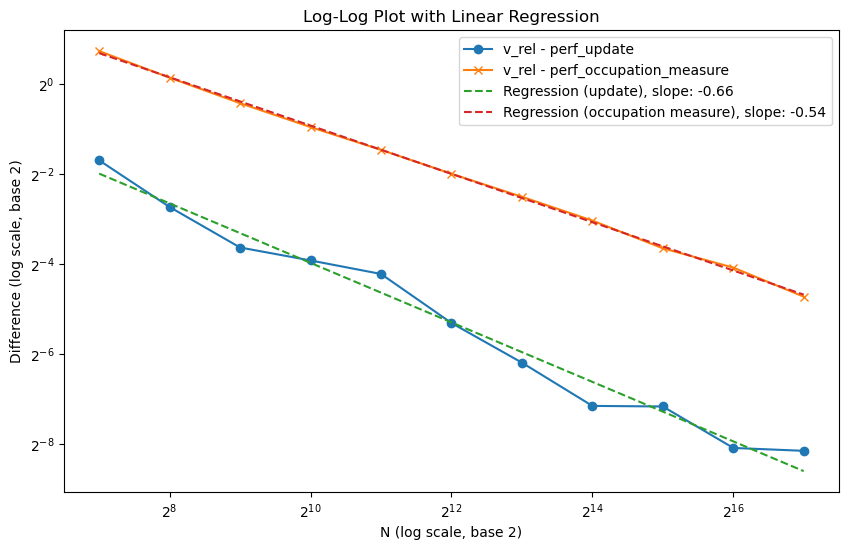

In [83]:
myN = [2**n for n in range(7,18)]

diff_update = [info[0] - info[1][0] for info in infos]
diff_occupation_measure = [info[0] - info[2][0] for info in infos]

# Log transformation of the data
log_myN = np.log2(myN)
log_diff_update = np.log2(np.abs(diff_update))  # Taking absolute value to avoid issues with log of negative numbers
log_diff_occupation_measure = np.log2(np.abs(diff_occupation_measure))

# Perform linear regression
slope_update, intercept_update, _, _, _ = linregress(log_myN, log_diff_update)
slope_occupation_measure, intercept_occupation_measure, _, _, _ = linregress(log_myN, log_diff_occupation_measure)

# Log-log plot with slopes in the labels
plt.figure(figsize=(10, 6))

# Plotting original data
plt.plot(myN, diff_update, label='v_rel - perf_update', marker='o')
plt.plot(myN, diff_occupation_measure, label='v_rel - perf_occupation_measure', marker='x')

# Plotting regression lines and including slopes in the labels
plt.plot(myN, 2 ** (slope_update * log_myN + intercept_update), label=f'Regression (update), slope: {slope_update:.2f}', linestyle='--')
plt.plot(myN, 2 ** (slope_occupation_measure * log_myN + intercept_occupation_measure), 
         label=f'Regression (occupation measure), slope: {slope_occupation_measure:.2f}', linestyle='--')

# Setting log scale for both axes with base 2
plt.xscale('log', base=2)
plt.yscale('log', base=2)

# Labels, title, and legend
plt.xlabel('N (log scale, base 2)')
plt.ylabel('Difference (log scale, base 2)')
plt.title('Log-Log Plot with Linear Regression')
plt.legend()

# Customizing the tick labels for log base 2
plt.gca().xaxis.set_major_locator(LogLocator(base=2))
plt.gca().yaxis.set_major_locator(LogLocator(base=2))

plt.show()